In [27]:
!pip install kaggle

In [28]:
!mkdir ~/.kaggle

!cp kaggle.json ~/.kaggle/

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [29]:
!chmod 600 ~/.kaggle/kaggle.json

In [30]:
! kaggle datasets list

ref                                                           title                                                    size  lastUpdated                 downloadCount  voteCount  usabilityRating  
------------------------------------------------------------  -------------------------------------------------  ----------  --------------------------  -------------  ---------  ---------------  
ahmeduzaki/global-earthquake-tsunami-risk-assessment-dataset  Global Earthquake-Tsunami Risk Assessment Dataset       16151  2025-10-01 16:35:53.273000           5828        224  1.0              
jaderz/hospital-beds-management                               Hospital Beds Management                                47583  2025-10-03 09:21:58.590000           4603        129  1.0              
ahmadrazakashif/bmw-worldwide-sales-records-20102024          BMW Worldwide Sales Records (2010–2024)                853348  2025-09-20 14:39:45.280000          11074        239  1.0              
grandmaster07/s

In [31]:
!kaggle datasets download ananthu017/emotion-detection-fer

Dataset URL: https://www.kaggle.com/datasets/ananthu017/emotion-detection-fer
License(s): CC0-1.0
emotion-detection-fer.zip: Skipping, found more recently modified local copy (use --force to force download)


In [32]:
# !unzip emotion-detection-fer.zip

Archive:  emotion-detection-fer.zip
replace test/angry/im0.png? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [37]:
import numpy as np
import pandas as pd

import os
import tensorflow as tf

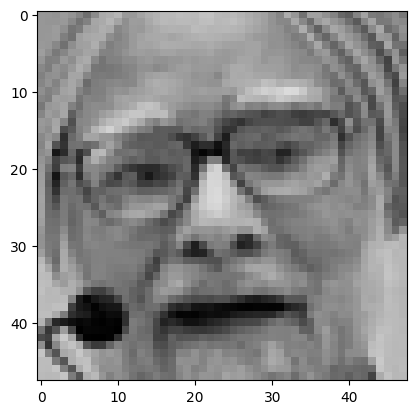

In [38]:
import cv2

img = cv2.imread("/content/train/angry/im1.png")

import matplotlib.pyplot as plt
plt.imshow(img)

In [39]:
img.shape

(48, 48, 3)

# Image Data loading (in batches)

In [40]:
from tensorflow.keras.utils import image_dataset_from_directory

training_dataset_path = "train"
batch_size = 32 # Load the images in batches

train_ds = image_dataset_from_directory(
    directory = training_dataset_path,
    labels = "inferred",
    label_mode = "categorical",
    color_mode = "grayscale",
    image_size = (48,48),
    batch_size = batch_size,
    shuffle = True,
    seed = 42,
    verbose = True
)

Found 28709 files belonging to 7 classes.


In [51]:
from keras.layers import Dense, Conv2D, AveragePooling2D, Flatten, Rescaling
from keras.models import Sequential

#Lenet Architecture

In [56]:
model = Sequential()

model.add( Rescaling(scale = 1./255, input_shape = (48,48,1)) )
model.add( Conv2D(filters = 6, kernel_size = (5,5), padding="valid", activation = "tanh"))
model.add( AveragePooling2D(pool_size = (2,2), strides= 2, padding="valid"))

model.add( Conv2D(filters = 16, kernel_size = (5,5), activation = "tanh"))
model.add( AveragePooling2D(pool_size = (2,2), strides= 2, padding="valid"))

model.add( Flatten())

model.add( Dense(units = 120, activation = "tanh"))
model.add( Dense(units = 84, activation = "tanh"))
model.add( Dense(units = 7, activation = "softmax"))

model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling_2 (Rescaling)         │ (None, 48, 48, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_15 (Conv2D)              │ (None, 44, 44, 6)      │           156 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d_16            │ (None, 22, 22, 6)      │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_16 (Conv2D)              │ (None, 18, 18, 16)     │         2,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d_17            │ (None, 9, 9, 16)       │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_8 (Flatten)             │ (None, 1296)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_24 (Dense)                │ (None, 120)            │       155,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_25 (Dense)                │ (None, 84)             │        10,164 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_26 (Dense)                │ (None, 7)              │           595 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 168,971 (660.04 KB)

 Trainable params: 168,971 (660.04 KB)

 Non-trainable params: 0 (0.00 B)

In [57]:
model.compile(optimizer = "adam", loss = "categorical_crossentropy", metrics = ["accuracy", "f1_score"])
model.fit(train_ds, epochs= 15 )

Epoch 1/15
898/898 ━━━━━━━━━━━━━━━━━━━━ 51s 54ms/step - accuracy: 0.3121 - f1_score: 0.2059 - loss: 1.7300
Epoch 2/15
898/898 ━━━━━━━━━━━━━━━━━━━━ 84s 57ms/step - accuracy: 0.3645 - f1_score: 0.2699 - loss: 1.6326
Epoch 3/15
898/898 ━━━━━━━━━━━━━━━━━━━━ 50s 55ms/step - accuracy: 0.3845 - f1_score: 0.2966 - loss: 1.5883
Epoch 4/15
898/898 ━━━━━━━━━━━━━━━━━━━━ 50s 55ms/step - accuracy: 0.4052 - f1_score: 0.3206 - loss: 1.5362
Epoch 5/15
898/898 ━━━━━━━━━━━━━━━━━━━━ 82s 55ms/step - accuracy: 0.4292 - f1_score: 0.3500 - loss: 1.4749
Epoch 6/15
898/898 ━━━━━━━━━━━━━━━━━━━━ 49s 54ms/step - accuracy: 0.4627 - f1_score: 0.3875 - loss: 1.4084
Epoch 7/15
898/898 ━━━━━━━━━━━━━━━━━━━━ 85s 58ms/step - accuracy: 0.4919 - f1_score: 0.4281 - loss: 1.3404
Epoch 8/15
898/898 ━━━━━━━━━━━━━━━━━━━━ 49s 54ms/step - accuracy: 0.5264 - f1_score: 0.4757 - loss: 1.2678
Epoch 9/15
898/898 ━━━━━━━━━━━━━━━━━━━━ 50s 56ms/step - accuracy: 0.5557 - f1_score: 0.5108 - loss: 1.1960
Epoch 10/15
898/898 ━━━━━━━━━━━━━━━━━

#Alternative Loading along with Augmenentation

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define data augmentation and preprocessing
datagen = ImageDataGenerator(
    rescale=1./255,  # Normalize pixel values to [0, 1]
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    validation_split=0.2 # Use 20% of data for validation
)

# Create training generator
train_generator = datagen.flow_from_directory(
    'path/to/your/image/dataset',
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical', # or 'binary' or 'sparse'
    subset='training'
)

# Create validation generator
validation_generator = datagen.flow_from_directory(
    'path/to/your/image/dataset',
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)